In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv")

In [3]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
df.shape

(506, 17)

In [5]:
#결측치 확인
df.isnull()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#불린형은 더할 수 있어요(+)
df.isnull().sum()

TOWN       0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
# 데이터 타입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


In [8]:
# 변수별 통계값 확인
df.describe()

,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,-71.019625,42.252250,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
# 타겟 변수 살펴보기
df['CMEDV'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

<Axes: >

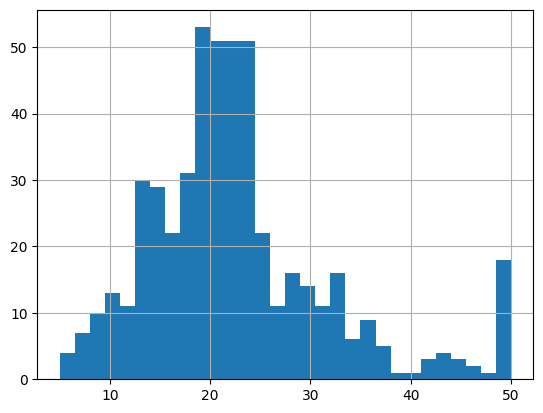

In [10]:
# 분포 히스토그램
df['CMEDV'].hist(bins=30)

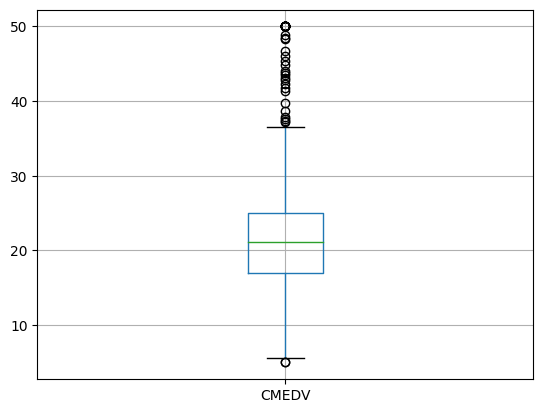

In [11]:
# 박스플롯
df.boxplot(column=['CMEDV'])
plt.show()

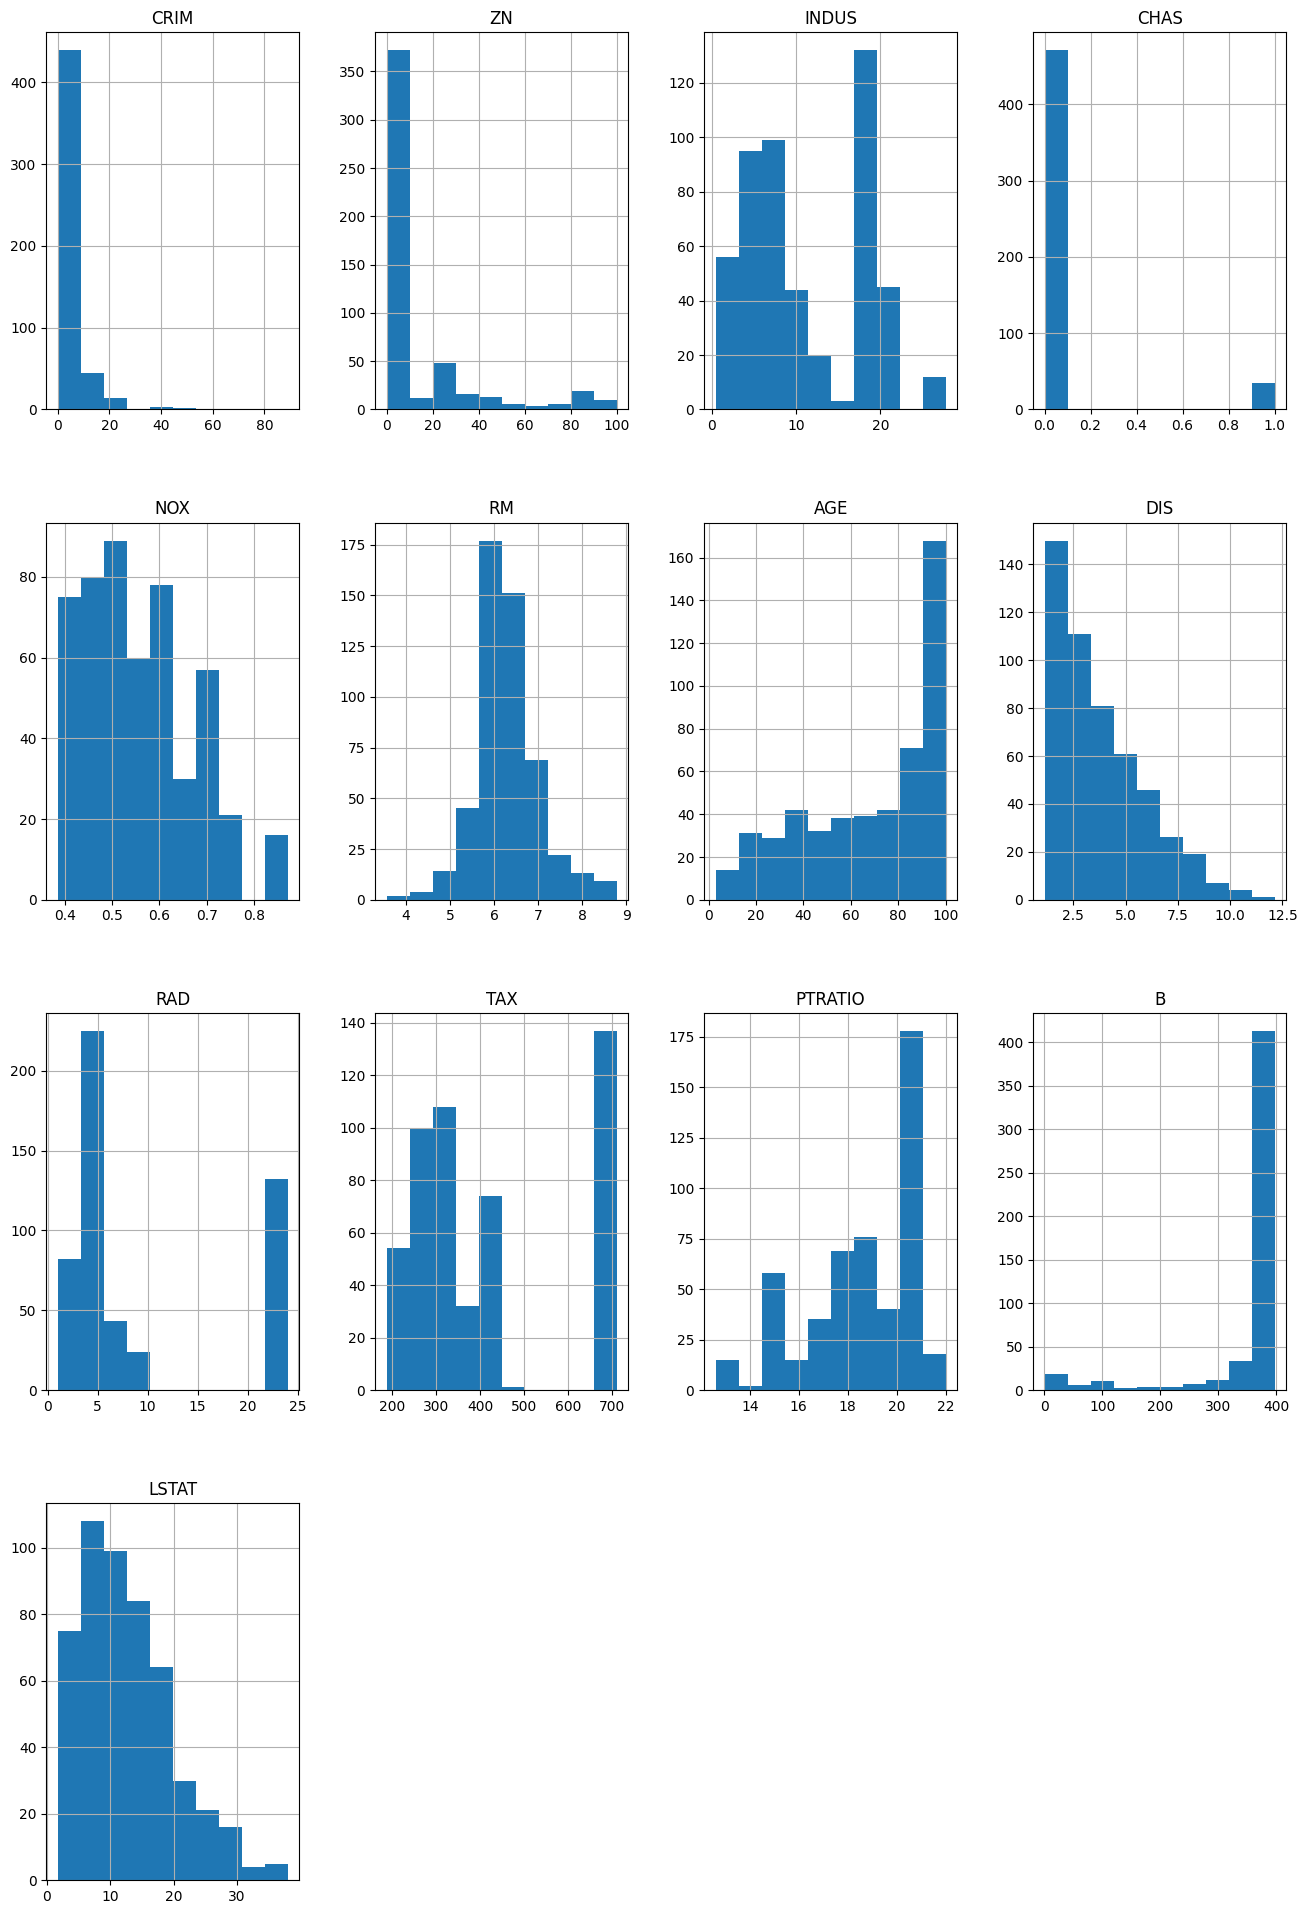

In [13]:
# numerical features (except "LON" & "LAT")
num_column = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

fig = plt.figure(figsize = (16, 24))
ax = fig.gca()  # Axes 생성

df[num_column].hist(ax=ax)
plt.show()

In [14]:
# Person 상관계수
cols = ['CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

corr = df[cols].corr()
corr

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


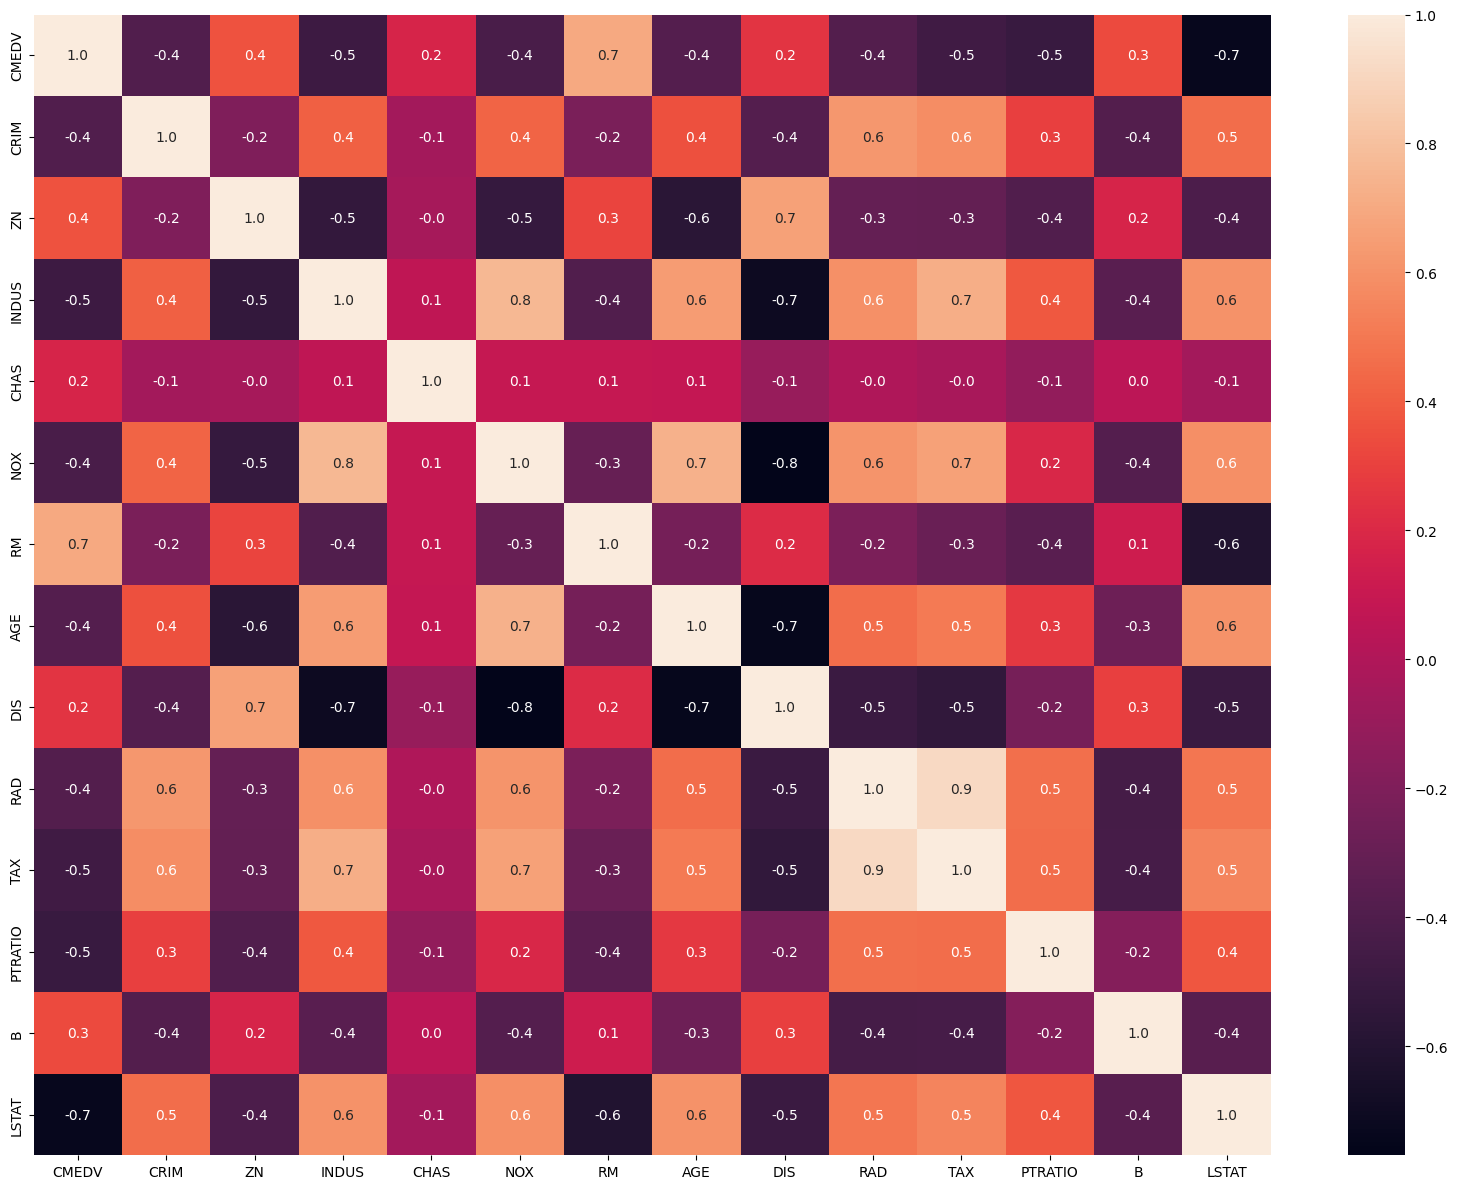

In [15]:
# heatmap (seaborn)
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

heatmap = sns.heatmap(corr.values, annot = True, fmt='.1f',
                      yticklabels = cols, xticklabels = cols, ax=ax)
plt.tight_layout()
plt.show()

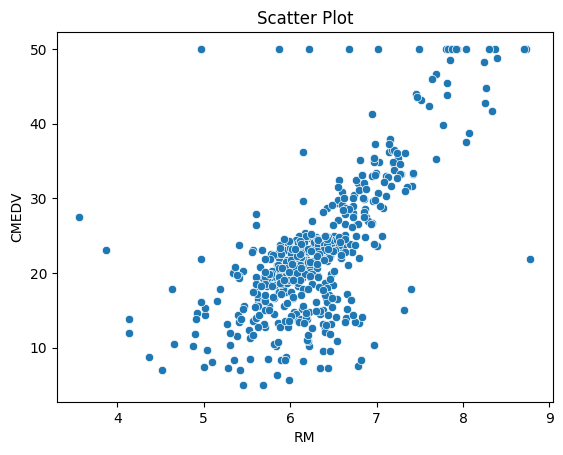

In [16]:
# 산점도 0.7이상
sns.scatterplot(data=df, x='RM', y='CMEDV')
plt.title('Scatter Plot')
plt.show()

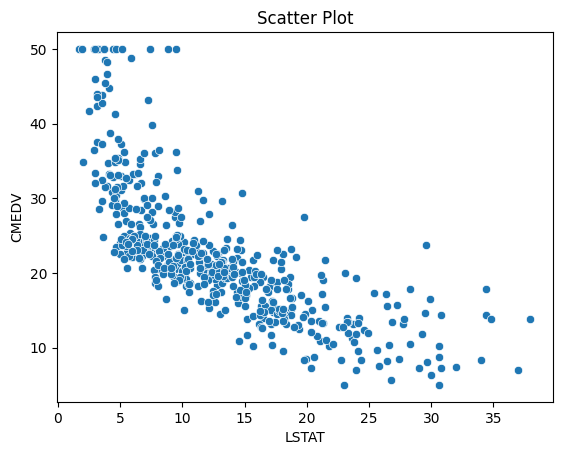

In [17]:
# 산점도 0.7이상
sns.scatterplot(data=df, x='LSTAT', y='CMEDV')
plt.title('Scatter Plot')
plt.show()

In [18]:
# 도시별 데이터 갯수 - 분석에 사용되지는 않지만 향후 추가적인 분석시 사용
# 범주형 범주는 일반적으로 잘 사용하지 않음.
# 개수가 적은 범주는 학습이 어려움

# 건설업이면 대출을 잘 갚는다?  -> 무조건 건설업이면 평가가 좋은가
# 유통업이면 대출을 잘 안갚는다? -> ''

# 1개의 모델을 만듬 -> 최대 5년을 사용하는데 1년만에 경기가 바뀌면 어떻게 함
# 범주가 3개 -> 데이터를 범주로 쪼개서 3개로 만들고 각각 모델을 만듬

df['TOWN'].value_counts()

Cambridge            30
Boston Savin Hill    23
Lynn                 22
Boston Roxbury       19
Newton               18
                     ..
Medfield              1
Dover                 1
Lincoln               1
Sherborn              1
Nahant                1
Name: TOWN, Length: 92, dtype: int64

<Axes: xlabel='CMEDV', ylabel='TOWN'>

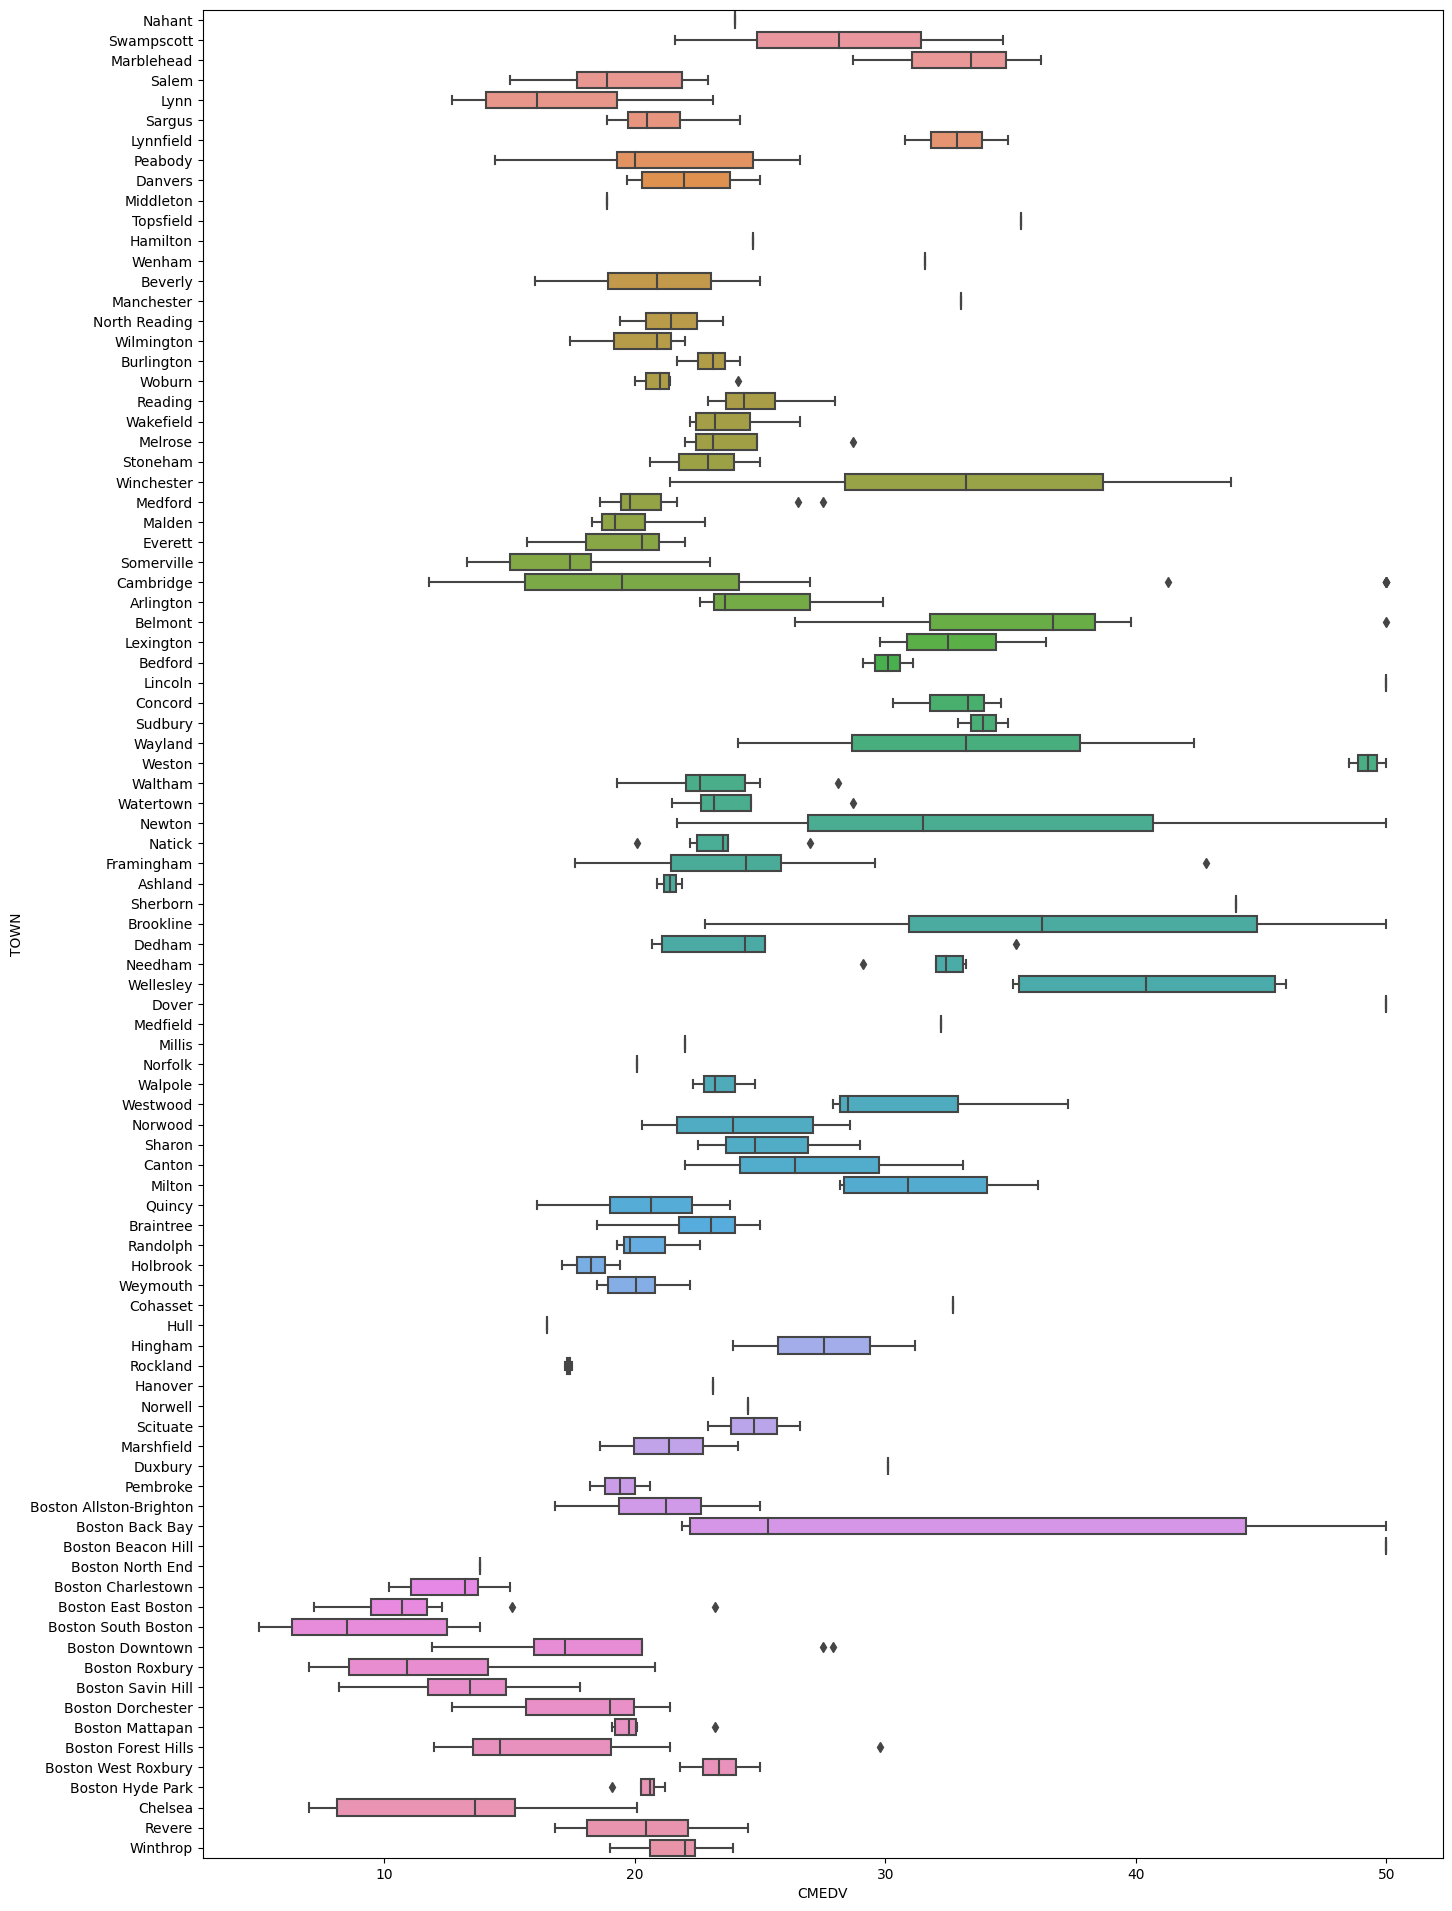

In [19]:
# 도시별 주택 가격 특징 (boxplot 이용)
fig = plt.figure(figsize = (16, 24))
sns.boxplot(x='CMEDV', y='TOWN', data=df)

<Axes: xlabel='CRIM', ylabel='TOWN'>

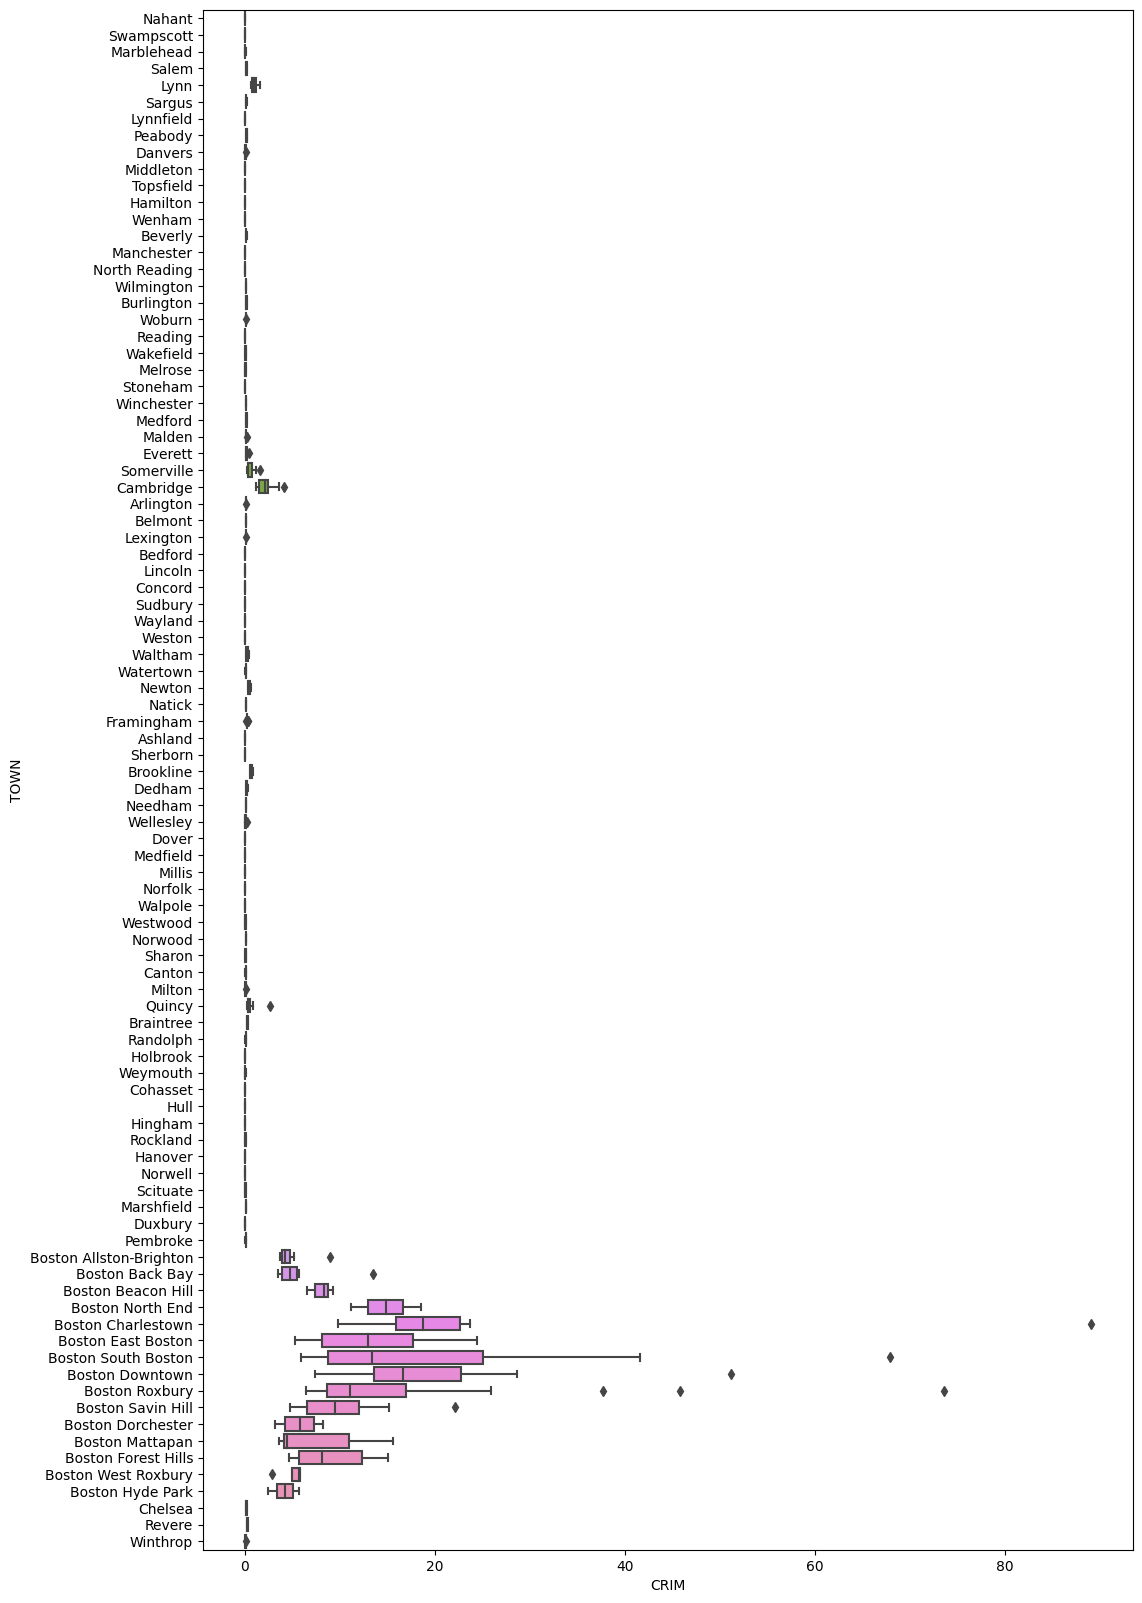

In [ ]:
# 도시별 범죄율 특징
fig = plt.figure(figsize = (12, 20))
sns.boxplot(x='CRIM', y='TOWN', data=df)

In [20]:
columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = df[columns]

In [21]:
from sklearn.model_selection import train_test_split

# split dataset into training & test
y = df['CMEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [22]:
X

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [23]:
X_train.shape, y_train.shape

((354, 12), (354,))

In [24]:
X_test.shape, y_test.shape

((152, 12), (152,))

In [25]:
# 다중공선성 체크 - 10 이상이면 다중공선성에 위배
# VIF Factor 10 이상이면 해당 변수를 제거하는 것을 생각해야한다.(또는 표준화?)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

,features,VIF Factor
0,CRIM,2.0
1,ZN,2.9
2,INDUS,14.2
3,NOX,70.6
4,RM,78.6
5,AGE,21.1
6,DIS,14.7
7,RAD,13.9
8,TAX,59.3
9,PTRATIO,84.8


In [26]:
# 다중공선성 개선하기(표준화)?

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 평균 0, 표준편차 1
scale_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X[scale_columns] = scaler.fit_transform(X[scale_columns])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [28]:
# 다중공선성 체크
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

,features,VIF Factor
0,CRIM,1.8
1,ZN,2.4
2,INDUS,3.8
3,NOX,4.4
4,RM,1.7
5,AGE,2.9
6,DIS,3.9
7,RAD,6.7
8,TAX,8.5
9,PTRATIO,1.8


In [29]:
# VIF값을 확인해보면, 모든 변수의 VIF값이 다 10 이하입니다. 따라서 다중공선성 문제가 존재하지 않아 모든 feature을 활용하여 회귀 모델링을 진행하면 됩니다.

In [30]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

In [31]:
# print coef
print(lr.coef_)

[-0.87452065  0.94805857  0.18101355 -1.99680152  2.22969965 -0.22595204
 -3.24250642  2.24534556 -1.88163186 -1.89168309  0.59413231 -4.24804092]


In [32]:
# "feature - coefficients" DataFrame 만들기
coefs = pd.DataFrame(zip(df[columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

,feature,coefficients
0,CRIM,-0.874521
1,ZN,0.948059
2,INDUS,0.181014
3,NOX,-1.996802
4,RM,2.229700
5,AGE,-0.225952
6,DIS,-3.242506
7,RAD,2.245346
8,TAX,-1.881632
9,PTRATIO,-1.891683


In [33]:
# 크기 순서로 나열
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
11,LSTAT,-4.248041
6,DIS,-3.242506
7,RAD,2.245346
4,RM,2.229700
3,NOX,-1.996802
9,PTRATIO,-1.891683
8,TAX,-1.881632
1,ZN,0.948059
0,CRIM,-0.874521
10,B,0.594132


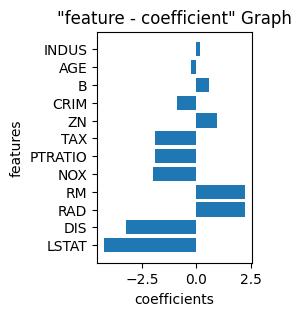

In [34]:
## coefficients 시각화

# figure size
plt.figure(figsize = (2, 3))

# bar plot
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

In [35]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     70.83
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           6.10e-85
Time:                        06:26:08   Log-Likelihood:                -1058.5
No. Observations:                 354   AIC:                             2143.
Df Residuals:                     341   BIC:                             2193.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2890      0.262     85.101      0.000      21.774      22.804
CRIM          -0.8745      0.320     -2.731      0.007      -1.504      -0.245
ZN             0.9481      0.417      2.273      0.024       0.128       1.768
INDUS          0.1810      0.510      0.355      0.723      -0.823       1.185
NOX           -1.9968      0.542     -3.685      0.000      -3.063      -0.931
RM             2.2297      0.345      6.471      0.000       1.552       2.907
AGE           -0.2260      0.452     -0.500      0.618      -1.116       0.664
DIS           -3.2425      0.534     -6.075      0.000      -4.292      -2.193
RAD            2.2453      0.687      3.268      0.001       0.894       3.597
TAX           -1.8816      0.771     -2.441      0.015      -3.398      -0.365
PTRATIO       -1.8917      0.351     -5.386      0.000      -2.582      -1.201
B              0.5941      0.295      2.015      0.045       0.014       1.174
LSTAT         -4.2480      0.449     -9.472      0.000      -5.130      -3.366
==============================================================================
Omnibus:                      167.039   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              928.806
Skew:                           1.946   Prob(JB):                    2.05e-202
Kurtosis:                       9.915   Cond. No.                         9.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

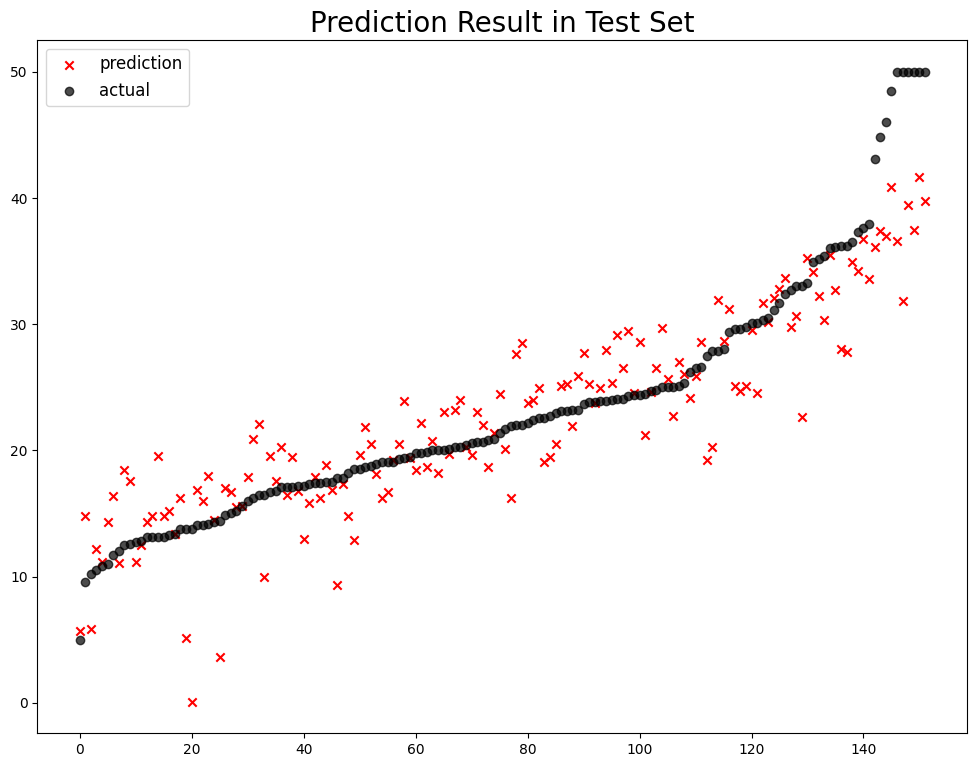

In [36]:
# 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

In [37]:
# R square
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

# test가 더 높은 값이 나오는 경우가 종종 있지만 주의해야함 / 보통은 training 데이터가 더 높음

# 샘플을 다양하게 테스트 (ex - k-fold 검증?)

0.7136706194719502
0.7735313455821096


In [38]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

# test set
print(sqrt(mean_squared_error(y_test, pred_test)))

4.812721893240211
4.528374280311743


In [39]:
X_train_re = X_train.drop(['INDUS','AGE'], axis = 1)

In [40]:
X_test = X_test.drop(['INDUS','AGE'], axis = 1)

In [41]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train_re, y_train)

# predict in test set
pred_test = lr.predict(X_test)

In [42]:
X_train2 = sm.add_constant(X_train_re)
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     85.36
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           8.60e-87
Time:                        06:36:32   Log-Likelihood:                -1058.7
No. Observations:                 354   AIC:                             2139.
Df Residuals:                     343   BIC:                             2182.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2905      0.261     85.314      0.000      21.777      22.804
CRIM          -0.8769      0.319     -2.747      0.006      -1.505      -0.249
ZN             0.9493      0.406      2.338      0.020       0.151       1.748
NOX           -2.0069      0.506     -3.964      0.000      -3.003      -1.011
RM             2.1869      0.337      6.499      0.000       1.525       2.849
DIS           -3.1923      0.500     -6.387      0.000      -4.175      -2.209
RAD            2.2097      0.654      3.380      0.001       0.924       3.496
TAX           -1.7824      0.680     -2.621      0.009      -3.120      -0.445
PTRATIO       -1.8963      0.350     -5.425      0.000      -2.584      -1.209
B              0.5818      0.293      1.985      0.048       0.005       1.158
LSTAT         -4.3057      0.425    -10.132      0.000      -5.142      -3.470
==============================================================================
Omnibus:                      164.902   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              896.021
Skew:                           1.926   Prob(JB):                    2.70e-195
Kurtosis:                       9.776   Cond. No.                         7.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# R square
print(model.score(X_train_re, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.7133516998783225
0.7747691210716303


In [44]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train_re)
print(sqrt(mean_squared_error(y_train, pred_train)))

# test set
print(sqrt(mean_squared_error(y_test, pred_test)))

4.815401401980454
4.515982299490092
